# File Ingestion

## Setup

Using local config file (see [01_pipeline](./01_pipeline.ipynb))

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()
from adamacs.pipeline import subject, behavior, session, event, trial
from adamacs.ingest import behavior as ibe


[2023-07-23 17:22:30,912][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-07-23 17:22:30,958][INFO]: Connected tobiasr@172.26.128.53:3306


Manual entry

### BPod Path Setup

Your `dj.config` file should have a section for your BPod root directory under `custom`: `exp_root_data_dir`. This is a list of one or more paths where the ingestion tool will look for the relative paths it is given.

In [2]:
import datajoint as dj
from element_interface.utils import find_full_path
from adamacs.pipeline import session, event, trial
from adamacs.ingest.bpod import Bpodfile
from adamacs.paths import get_experiment_root_data_dir

bpod_path = "DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat"
# bpod_path = "TR_WEZ-8701_2023-01-13_scan9FG1THFD_sess9FG1TAXY/scan9FG1THFD_WEZ-8701_StimArenaMaster_20230113_172307.mat"

root_dirs = dj.config["custom"]["exp_root_data_dir"]
bpod_path_full = find_full_path(get_experiment_root_data_dir(),bpod_path)

print(f"Root: {root_dirs}\nFull: {bpod_path_full}")

Root: ['/datajoint-data/data/tobiasr']
Full: /datajoint-data/data/tobiasr/DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat


### Initial check of tables

In [3]:
# from adamacs.pipeline import session, event, trial

# session.Session.delete()


# print('Sessions:', len(session.Session()))
# print('Trials  :', len(trial.Trial()))
# print('Events  :', len(event.Event()))

In [4]:
# event.EventType.delete()

In [5]:
event.BehaviorRecording()

session_id,scan_id,recording_start_time,recording_duration,recording_notes
sess9FJ5PTCQ,scan9FJ5PTCQ,2023-07-20 16:01:50,320.0,


In [6]:
dj.Diagram(behavior)+dj.Diagram(event)+dj.Diagram(trial)

ValueError: Node names and attributes should not contain ":" unless they are quoted with "".                    For example the string 'attribute:data1' should be written as '"attribute:data1"'.                    Please refer https://github.com/pydot/pydot/issues/258

## Automated BPod ingestion

The function is designed ask for a confirmation before entered into the schema.

In [8]:
session.Session()

session_id,subject PyRat import uses this for earmark value,session_datetime
sess9FB2LN5C,WEZ-8701,2022-03-18 00:00:00
sess9FI8ETDQ,ROS-1518,2023-05-25 00:00:00
sess9FJ4IJOQ,ROS-1518,2023-07-18 00:00:00
sess9FJ5PTCQ,OPI-1681,2023-07-20 00:00:00


In [9]:
bpod_path = "DB_WEZ-8701_2022-03-18_scan9FB2LN5C_sess9FB2LN5C/scan9FB2LN5C_WEZ-8701_StimArenaMaster_20220318_165447.mat"
root_dirs = dj.config["custom"]["exp_root_data_dir"]
bpod_object = Bpodfile(bpod_path)




In [7]:
bpod_object.ingest('sess9FB2LN5C', 'scan9FB2LN5C')

NameError: name 'bpod_object' is not defined

In [10]:
event.Event()

session_id,scan_id,event_type,event_start_time (second) relative to recording start,event_end_time (second) relative to recording start
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,31.983,32.083
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,63.5972,63.6972
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,92.1419,92.2419
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,110.971,111.071
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,125.036,125.136
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,137.26,137.36
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,152.14,152.24
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,169.614,169.714
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,184.736,184.837
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,218.035,218.135


In [11]:
scansi = "scan9FJ5PTCQ"
(event.Event & f'scan_id = "{scansi}"')

session_id,scan_id,event_type,event_start_time (second) relative to recording start,event_end_time (second) relative to recording start
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,31.983,32.083
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,63.5972,63.6972
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,92.1419,92.2419
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,110.971,111.071
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,125.036,125.136
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,137.26,137.36
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,152.14,152.24
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,169.614,169.714
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,184.736,184.837
sess9FJ5PTCQ,scan9FJ5PTCQ,aux_bpod_reward,218.035,218.135


In [12]:
(trial.TrialEvent & f'scan_id = "{scansi}"' & "trial_id = 1").fetch(format = "frame", order_by = "event_start_time")

,,,,
session_id,scan_id,trial_id,event_type,event_start_time


Check that insertion worked:

In [13]:
trial.TrialEvent & 'trial_id=0'

session_id,scan_id,trial_id trial number (1-based indexing),event_type,event_start_time (second) relative to recording start


We can also interact with bpod objects. For example:

In [14]:
bpod_object.trial(2).events

{'cue': 8.995299999999999,
 'at_target': 9.0053,
 'at_port': 30.000000000000007,
 'reward': 30.10000000000001,
 'drinking': None}

In [15]:
bpod_object.trial(2).attributes

{'error': False, 'timeout': True}

In [16]:
bpod_object.trial_data

[{'States': {'WaitForPosTriggerSoftCode': array([0.    , 1.2392]),
   'CueDelay': array([1.2392, 1.2492]),
   'WaitForResponse': array([ 1.2492, 31.2492]),
   'Port1RewardDelay': array([nan, nan]),
   'Port2RewardDelay': array([nan, nan]),
   'Port3RewardDelay': array([nan, nan]),
   'Port4RewardDelay': array([nan, nan]),
   'PA1_Port1RewardDelay': array([nan, nan]),
   'PA1_Port2RewardDelay': array([nan, nan]),
   'PA1_Port3RewardDelay': array([nan, nan]),
   'PA1_Port4RewardDelay': array([nan, nan]),
   'Port1Reward': array([nan, nan]),
   'Port2Reward': array([nan, nan]),
   'Port3Reward': array([nan, nan]),
   'Port4Reward': array([nan, nan]),
   'PA1_Port1Reward': array([nan, nan]),
   'PA1_Port2Reward': array([nan, nan]),
   'PA1_Port3Reward': array([nan, nan]),
   'PA1_Port4Reward': array([nan, nan]),
   'CloseValves': array([nan, nan]),
   'Drinking': array([nan, nan]),
   'Punish': array([nan, nan]),
   'EarlyWithdrawal': array([nan, nan])},
  'Events': {'SoftCode10': 1.2392,


# Add Harp recording

In [17]:
from adamacs.pipeline import behavior, event, scan
from adamacs.ingest.harp import HarpLoader, HarpLoader_sync
event_recording = event.BehaviorRecording.fetch('KEY')[0]
behavior.HarpRecording()

session_id,scan_id,harp_device_id


In [18]:
event.BehaviorRecording()

session_id,scan_id,recording_start_time,recording_duration,recording_notes
sess9FJ5PTCQ,scan9FJ5PTCQ,2023-07-20 16:01:50,320.0,


In [19]:
event_recording

{'session_id': 'sess9FJ5PTCQ', 'scan_id': 'scan9FJ5PTCQ'}

In [20]:
event.BehaviorRecording.File()

session_id,scan_id,filepath
sess9FJ5PTCQ,scan9FJ5PTCQ,/datajoint-data/data/tobiasr/RN_OPI-1681_2023-07-20_scan9FJ5PTCQ_sess9FJ5PTCQ/scan9FJ5PTCQ_RN_test_recording_0008.h5


In [21]:
scansi = "scan9FB2LN5C"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0]

bpod_path_relative = (event.BehaviorRecording.File & scan_key).fetch1("filepath")
harp_paths = list(find_full_path(
    get_experiment_root_data_dir(), bpod_path_relative
).parent.glob("*harp*bin"))

DataJointError: fetch1 should only return one tuple. 0 tuples found

In [ ]:
scansi = "scan9FJ5PTCQ"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0]

bpod_path_relative = (event.BehaviorRecording.File & scan_key).fetch1("filepath")
harp_paths = list(find_full_path(
    get_experiment_root_data_dir(), bpod_path_relative
).parent.glob("*IMU_harp*csv"))

In [ ]:
harp_paths

In [ ]:
allchans = HarpLoader(harp_paths[0]).data_for_insert()

In [ ]:
allchans

In [23]:
scansi = "scan9FJ5PTCQ"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0]

bpod_path_relative = (event.BehaviorRecording.File & scan_key).fetch1("filepath")
harp_paths = list(find_full_path(
    get_experiment_root_data_dir(), bpod_path_relative
).parent.glob("*2Pframes_harp*csv"))

In [24]:
harp_paths

[PosixPath('/datajoint-data/data/tobiasr/RN_OPI-1681_2023-07-20_scan9FJ5PTCQ_sess9FJ5PTCQ/scan9FJ5PTCQ_AnalogInput_2Pframes_harp_weardata_2023-07-20T16_03_47.csv')]

In [25]:
allchans_sync = HarpLoader_sync(harp_paths[0]).data_for_insert()

In [26]:
allchans_sync + allchans

NameError: name 'allchans' is not defined

In [27]:
behavior.HarpRecording.populate()

In [ ]:
# event.BehaviorRecording.delete()

In [ ]:
bpod_path_relative

In [ ]:
bpod_path_relative 

In [28]:
behavior.HarpRecording.Channel() & scan_key

session_id,scan_id,harp_device_id,channel_name,data 1d array of acquired data for this channel,time 1d array of timestamps for this channel
sess9FJ5PTCQ,scan9FJ5PTCQ,1,2p sync,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU accelerometer 1,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU accelerometer 2,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU accelerometer 3,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU gyroscope 1,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU gyroscope 2,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU gyroscope 3,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU magnetometer 1,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU magnetometer 2,=BLOB=,=BLOB=
sess9FJ5PTCQ,scan9FJ5PTCQ,1,IMU magnetometer 3,=BLOB=,=BLOB=


In [45]:
accelerometer = (behavior.HarpRecording.Channel() & "channel_name LIKE 'IMU accelerometer %'").fetch("data")
gyroscope = (behavior.HarpRecording.Channel() & "channel_name LIKE 'IMU gyroscope %'").fetch("data")
magnetometer = (behavior.HarpRecording.Channel() & "channel_name LIKE 'IMU magnetometer %'").fetch("data")
twopframes = (behavior.HarpRecording.Channel() & "channel_name LIKE '2p %'").fetch("data")
twopptime = (behavior.HarpRecording.Channel() & "channel_name LIKE '2p %'").fetch("time")

In [42]:
twopptime[0]

array([     0,      2,      4, ..., 321246, 321248, 321250])

In [49]:
twopframes[0]

array([0, 0, 0, ..., 0, 0, 0])

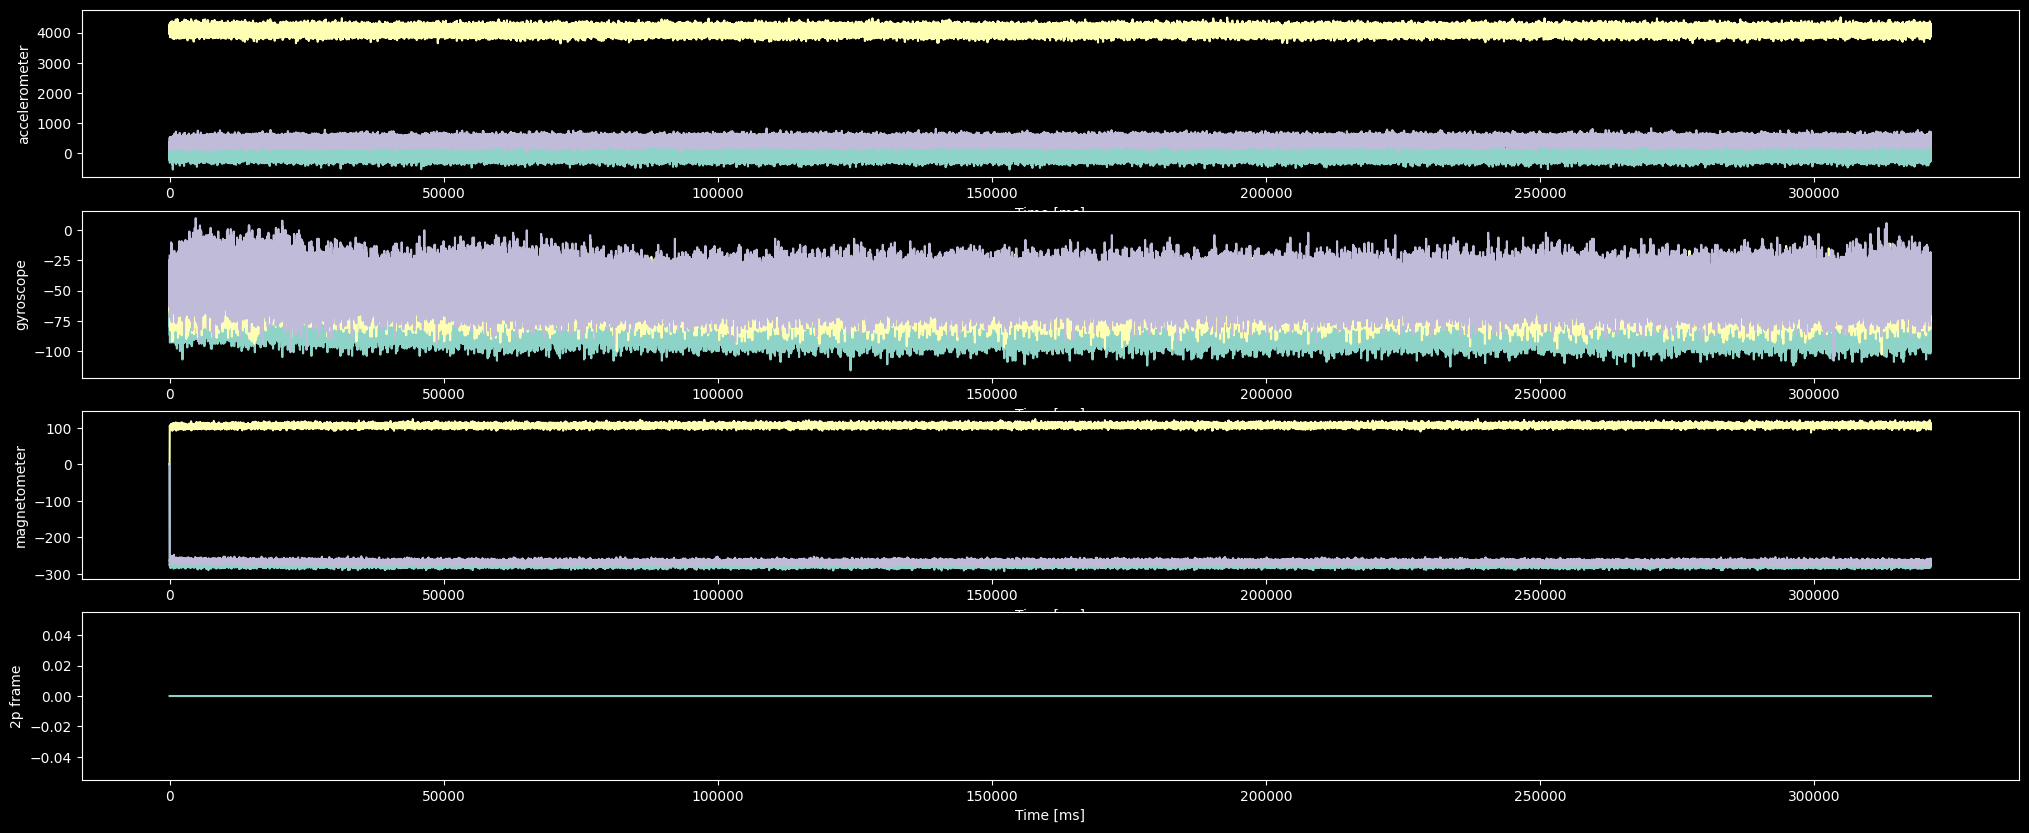

In [50]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25, 10))
# plt.rcParams['agg.path.chunksize'] = 10000  # Add this line if it does not rende


for i, arr in enumerate(accelerometer):
    axes[0].plot(twopptime[0][:-1],arr, label=f'acellerometer {i+1}')
    
# axes[0].set_ylim([-10, 370])
axes[0].set_ylabel("accelerometer")
axes[0].set_xlabel("Time [ms]")

for i, arr in enumerate(gyroscope):
    axes[1].plot(twopptime[0][:-1],arr, label=f'gyroscope {i+1}')
    
axes[1].set_ylabel("gyroscope")
axes[1].set_xlabel("Time [ms]")

for i, arr in enumerate(magnetometer):
    axes[2].plot(twopptime[0][:-1],arr, label=f'magnetometer {i+1}')
    
# axes[2].set_ylim([-10, 370])
axes[2].set_ylabel("magnetometer")
axes[2].set_xlabel("Time [ms]")


for i, arr in enumerate(twopframes):
    axes[3].plot(twopptime[0][:-1],twopframes[0][:-1], label=f'2p frames {i+1}')
    
# axes[2].set_ylim([-10, 370])
axes[3].set_ylabel("2p frame")
axes[3].set_xlabel("Time [ms]")


plt.show() 

In [ ]:
behavior.HarpRecording.Channel()